# Análisis Exploratorio, Generación de Datos Tidy y PCA


A continuación se presenta el análisis exploratorio de la base de datos generada `percep_seguridad_crimenes.csv` asi como también la conversión de los datos a tidy y un análisis de componentes principales.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

#Label encoder
from sklearn.preprocessing import LabelEncoder


In [2]:
#ggplot
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15,7] 

## Cargar base de datos 

In [3]:
df = pd.read_csv('percep_seguridad_crimenes.csv')
df.head()

,Year,State,conf_policia,percep_ausencia_corrupcion_sistjud,percep_conf_jueces,percep_inseguridad,iden_polfed_efectivo,porcentaje_victimas_hogares,porcentaje_victimas_mujeres,tasa_incid_delictiva,tasa_inseg_localidad,tasa_inseg_estado,tasa_inseg_municipio,tasa_prev_delictiva,tasa_prev_delictiva_hombres,tasa_prev_delictiva_mujeres,Number_crimes
0,2017-01-01,Aguascalientes,61.817796,31.930026,55.949418,44.827865,407012.0,38.153420,30.916999,39912.102305,44827.865476,43691.023274,42236.707531,33875.508856,37403.707853,30916.998913,33548
1,2017-01-01,Baja California,49.079807,31.875999,61.193246,43.258123,1215997.0,39.462809,36.984949,43921.170391,43258.122670,58046.093334,57866.636621,36578.058654,36137.616181,36984.948982,111722
2,2017-01-01,Baja California Sur,57.086667,32.155781,60.095192,36.963243,281409.0,26.761688,22.897988,25689.635950,36963.243484,60904.611272,63107.863667,24427.425925,26027.926176,22897.987797,24174
3,2017-01-01,Campeche,54.883432,31.043332,61.259995,44.118339,287020.0,28.819710,20.141363,28283.423371,44118.339148,57568.365503,59021.799152,22665.681125,25284.311603,20141.363362,2056
4,2017-01-01,Chiapas,50.879062,29.359444,58.410852,35.523101,996821.0,20.108133,15.156709,20464.080303,35523.101315,61066.835066,61997.790672,15630.971192,16180.203169,15156.708958,25364


## Limpieza de datos

### Codificación de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                124 non-null    object 
 1   State                               124 non-null    object 
 2   conf_policia                        124 non-null    float64
 3   percep_ausencia_corrupcion_sistjud  124 non-null    float64
 4   percep_conf_jueces                  124 non-null    float64
 5   percep_inseguridad                  124 non-null    float64
 6   iden_polfed_efectivo                124 non-null    float64
 7   porcentaje_victimas_hogares         124 non-null    float64
 8   porcentaje_victimas_mujeres         124 non-null    float64
 9   tasa_incid_delictiva                124 non-null    float64
 10  tasa_inseg_localidad                124 non-null    float64
 11  tasa_inseg_estado                   124 non-n

Podemos observar que no hay ningún dato faltante y que las variables `Year` y `State` no tienen el correcto tipo de dato.

In [5]:
#Cambiamos el formato de Year a datetime, State a category
df.Year = pd.to_datetime(df.Year)
df.State = df.State.astype('category')
df.dtypes

Year                                  datetime64[ns]
State                                       category
conf_policia                                 float64
percep_ausencia_corrupcion_sistjud           float64
percep_conf_jueces                           float64
percep_inseguridad                           float64
iden_polfed_efectivo                         float64
porcentaje_victimas_hogares                  float64
porcentaje_victimas_mujeres                  float64
tasa_incid_delictiva                         float64
tasa_inseg_localidad                         float64
tasa_inseg_estado                            float64
tasa_inseg_municipio                         float64
tasa_prev_delictiva                          float64
tasa_prev_delictiva_hombres                  float64
tasa_prev_delictiva_mujeres                  float64
Number_crimes                                  int64
dtype: object

### Valores Duplicados

In [6]:
#Buscamos valores duplicados
df.duplicated().sum()

0

No nos encontramos con valores duplicados.

### Creación de Columna de Regiones

Dividiremos nuestros datos por las 8 regiones de México

In [7]:
#Lista de Regiones
noroeste = ['Baja California', 'Baja California Sur', 'Chihuahua', 'Durango', 'Sinaloa', 'Sonora']
noreste = ['Coahuila de Zaragoza','Nuevo León','Tamaulipas']
oeste = ['Colima', 'Jalisco', 'Michoacán de Ocampo', 'Nayarit']
oriente = ['Hidalgo', 'Puebla', 'Tlaxcala', 'Veracruz de Ignacio de la Llave']
centronorte = ['Aguascalientes', 'Guanajuato', 'Querétaro', 'San Luis Potosí', 'Zacatecas']
centrosur = ['Ciudad de México', 'Morelos']
suroeste =['Chiapas', 'Guerrero', 'Oaxaca']
sureste = ['Campeche', 'Quintana Roo', 'Tabasco', 'Yucatán']

In [8]:
#Crear columna de Regiones
regiones= [
    (df.State.isin(noroeste)) ,
    (df.State.isin(noreste)),
    (df.State.isin(oeste)),
    (df.State.isin(oriente)),
    (df.State.isin(centronorte)),
    (df.State.isin(centrosur)),
    (df.State.isin(suroeste)),
    (df.State.isin(sureste))]
choicelist = ['Noroeste', 'Noreste', 'Oeste', 'Oriente', 'Centronorte','Centrosur', 'Suroeste', 'Sureste']
df['Regiones'] = np.select(regiones, choicelist, default='Not Specified')

In [9]:
df.head()

,Year,State,conf_policia,percep_ausencia_corrupcion_sistjud,percep_conf_jueces,percep_inseguridad,iden_polfed_efectivo,porcentaje_victimas_hogares,porcentaje_victimas_mujeres,tasa_incid_delictiva,tasa_inseg_localidad,tasa_inseg_estado,tasa_inseg_municipio,tasa_prev_delictiva,tasa_prev_delictiva_hombres,tasa_prev_delictiva_mujeres,Number_crimes,Regiones
0,2017-01-01,Aguascalientes,61.817796,31.930026,55.949418,44.827865,407012.0,38.153420,30.916999,39912.102305,44827.865476,43691.023274,42236.707531,33875.508856,37403.707853,30916.998913,33548,Centronorte
1,2017-01-01,Baja California,49.079807,31.875999,61.193246,43.258123,1215997.0,39.462809,36.984949,43921.170391,43258.122670,58046.093334,57866.636621,36578.058654,36137.616181,36984.948982,111722,Noroeste
2,2017-01-01,Baja California Sur,57.086667,32.155781,60.095192,36.963243,281409.0,26.761688,22.897988,25689.635950,36963.243484,60904.611272,63107.863667,24427.425925,26027.926176,22897.987797,24174,Noroeste
3,2017-01-01,Campeche,54.883432,31.043332,61.259995,44.118339,287020.0,28.819710,20.141363,28283.423371,44118.339148,57568.365503,59021.799152,22665.681125,25284.311603,20141.363362,2056,Sureste
4,2017-01-01,Chiapas,50.879062,29.359444,58.410852,35.523101,996821.0,20.108133,15.156709,20464.080303,35523.101315,61066.835066,61997.790672,15630.971192,16180.203169,15156.708958,25364,Suroeste


## EDA

In [10]:
df.describe()

,conf_policia,percep_ausencia_corrupcion_sistjud,percep_conf_jueces,percep_inseguridad,iden_polfed_efectivo,porcentaje_victimas_hogares,porcentaje_victimas_mujeres,tasa_incid_delictiva,tasa_inseg_localidad,tasa_inseg_estado,tasa_inseg_municipio,tasa_prev_delictiva,tasa_prev_delictiva_hombres,tasa_prev_delictiva_mujeres,Number_crimes
count,124.000000,124.000000,124.000000,124.000000,1.240000e+02,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,55.659076,29.347335,59.075606,43.751388,7.203396e+05,27.845383,22.619471,30783.566074,43453.011616,71281.359317,64347.735167,23577.611624,24685.597330,22619.471014,51937.870968
std,7.783491,6.540878,6.333329,9.957837,5.000947e+05,7.504159,6.221772,10734.613369,9773.120835,14308.148498,12321.117725,6447.755322,6921.543422,6221.772091,45822.233040
min,30.009747,12.088412,34.332645,22.313800,9.874500e+04,14.498820,12.362687,13902.777903,22313.800439,26570.007091,25154.621192,12258.007041,12142.102100,12362.686879,2003.000000
25%,51.992228,25.725602,55.431417,36.938875,3.787450e+05,21.931227,17.131504,22515.090731,36938.875365,61026.279118,57267.530215,17751.329183,19028.678903,17131.504458,24118.500000
50%,54.841981,29.660044,59.707310,43.651604,6.157130e+05,27.240832,22.138032,28684.784089,43463.293295,73539.887466,64998.608525,23451.128132,24630.867897,22138.032022,41548.000000
75%,60.004646,33.294972,62.914471,49.636598,9.302145e+05,32.103920,26.111922,35654.798838,49154.370529,83104.690166,73280.525434,27549.917241,29580.482627,26111.922254,60485.750000
max,79.514138,48.601081,74.251187,68.601228,2.561252e+06,52.790376,40.472677,69715.896529,67803.615096,91935.612634,87871.212042,43069.019062,46342.936166,40472.676663,242839.000000


Podemos observar que el promedio de percepción de inseguridad desde el 2017 al 2020 es del 43.75%, menor que el promedio de porcentaje de confianza en la policía el cual es del 55.65%. Un promedio de 720,339 personas alrededor del estado identifican a la policía federal y consideran efectivo su trabajo en estos años. La percepción de ausencia de la corrupción por parte del sistema judicial tiene un promedo de casi el 30%, en los años de 2017 al 2020.

### Analicemos lo sucedido en 2020

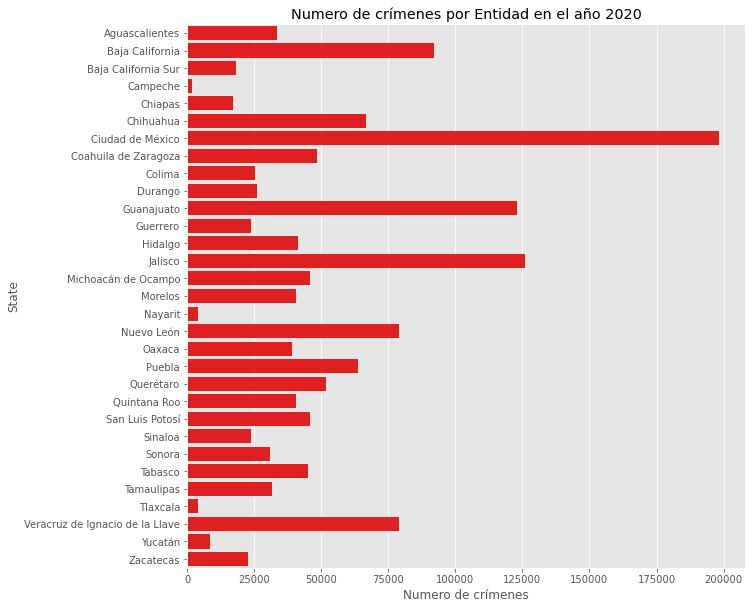

In [11]:
#Número de crímenes por entidad
df_2020 = df[df.Year == '2020'][['State','Number_crimes']]
f, ax = plt.subplots(figsize = (10,10))
sns.barplot(y = 'State', x = 'Number_crimes', data = df_2020, color = 'red')
plt.title('Numero de crímenes por Entidad en el año 2020')
plt.xlabel('Numero de crímenes')
plt.savefig('crimenes_estado_2020.png')
plt.show()


Significativamente la Ciudad de México es la entidad que mayor número de crímenes presentó en el año 2020 seguido de Jalisco e Hidalgo.

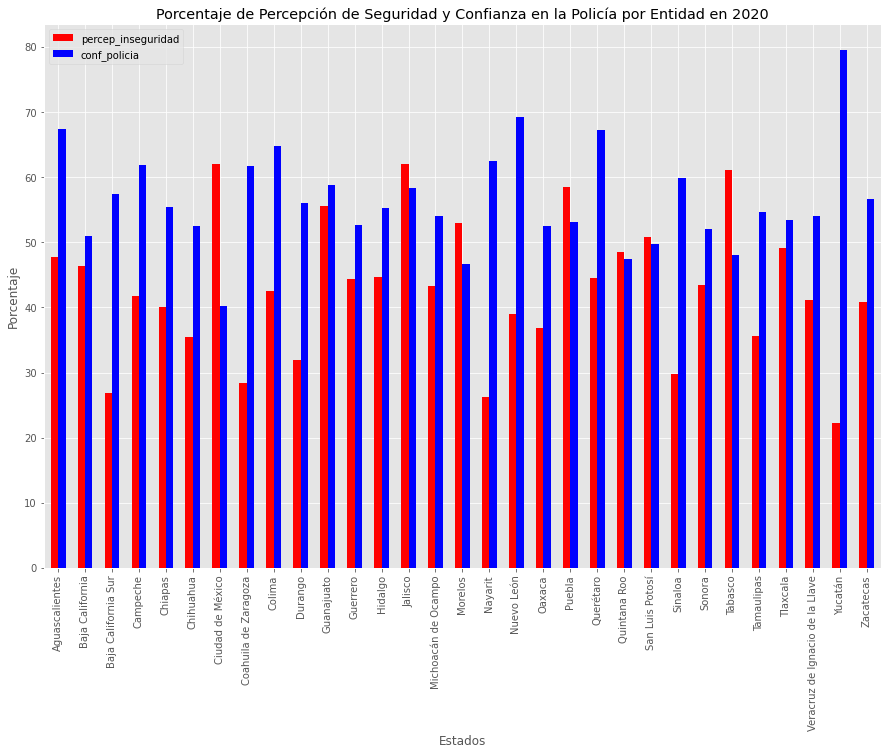

In [12]:
# Percepción de Seguridad y Confianza en la policía
df_2020 = df[df.Year == '2020'][['State','percep_inseguridad','conf_policia']]
df_2020.plot(x="State", y=["percep_inseguridad", "conf_policia"], kind="bar",color =['red','blue'],figsize=(15,10), width=0.55)
plt.xlabel("Estados")
plt.ylabel("Porcentaje")
plt.title('Porcentaje de Percepción de Seguridad y Confianza en la Policía por Entidad en 2020')
plt.savefig('percep_seguridad_conf_pol_2020.png')
plt.show()


Observemos que Yucatán es el estado de la República que confía más en la Policía y que tiene menor percepción de inseguridad en este último año. 

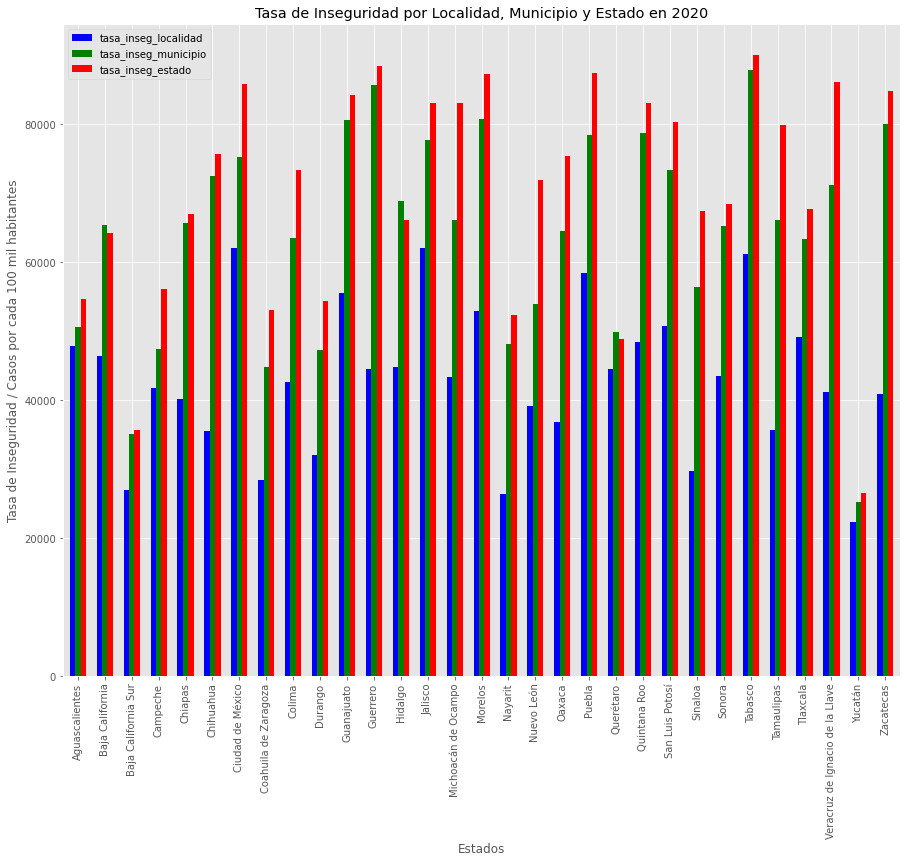

In [13]:
#Tasa de inseguridad por localidad, municipio y estado
df_2020 = df[df.Year == '2020'][['State','tasa_inseg_localidad','tasa_inseg_municipio','tasa_inseg_estado']]
df_2020.plot(x="State", y=['tasa_inseg_localidad','tasa_inseg_municipio','tasa_inseg_estado'], kind="bar",color =['blue','green','red'],figsize=(15,12),width=0.6)
plt.xlabel("Estados")
plt.ylabel("Tasa de Inseguridad / Casos por cada 100 mil habitantes")
plt.title('Tasa de Inseguridad por Localidad, Municipio y Estado en 2020')
plt.savefig('tasa_inseguridad_2020.png')
plt.show()


Igualmente se observa que Yucatán es el estado en el que se tiene menor tasa de inseguridad por localidad, municipio y estado, seguido de Baja California Sur.

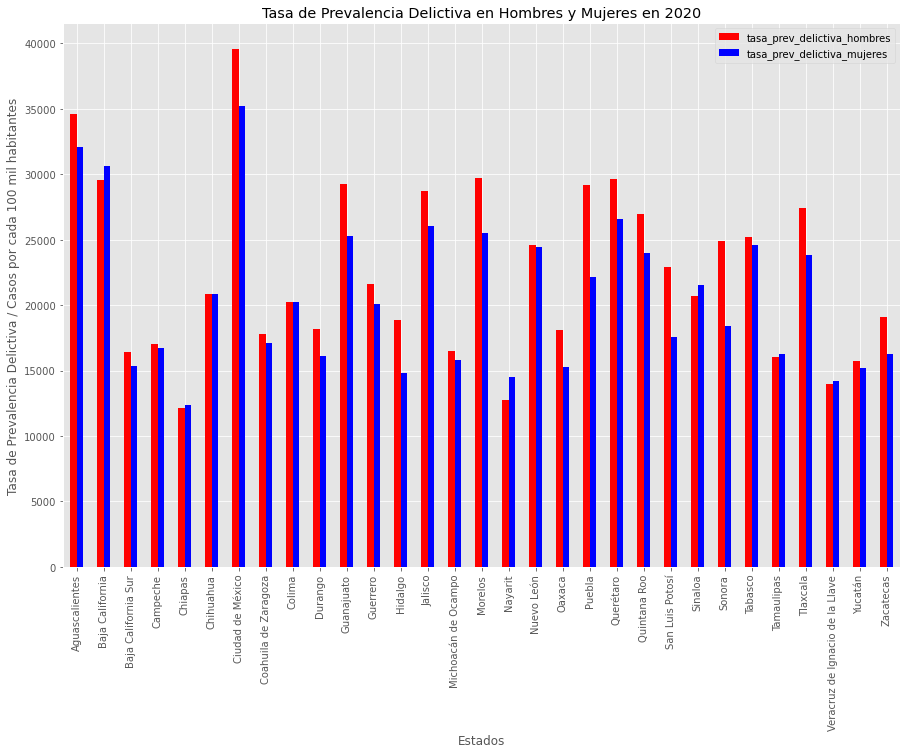

In [14]:
#Tasa de prevalencia delictiva en hombres y mujeres
df_2020 = df[df.Year == '2020'][['State','tasa_prev_delictiva_hombres','tasa_prev_delictiva_mujeres']]
df_2020.plot(x="State", y=['tasa_prev_delictiva_hombres','tasa_prev_delictiva_mujeres'], kind="bar",color =['red','blue'],figsize=(15,10))
plt.xlabel("Estados")
plt.ylabel("Tasa de Prevalencia Delictiva / Casos por cada 100 mil habitantes")
plt.title('Tasa de Prevalencia Delictiva en Hombres y Mujeres en 2020')
plt.savefig('prev_delictiva_2020.png')
plt.show()


La Ciudad de México y Aguascalientes son los estados de la República en el que se obtuvieron mayores tasas de incidencia delictiva en hombres y mujeres en 2020.

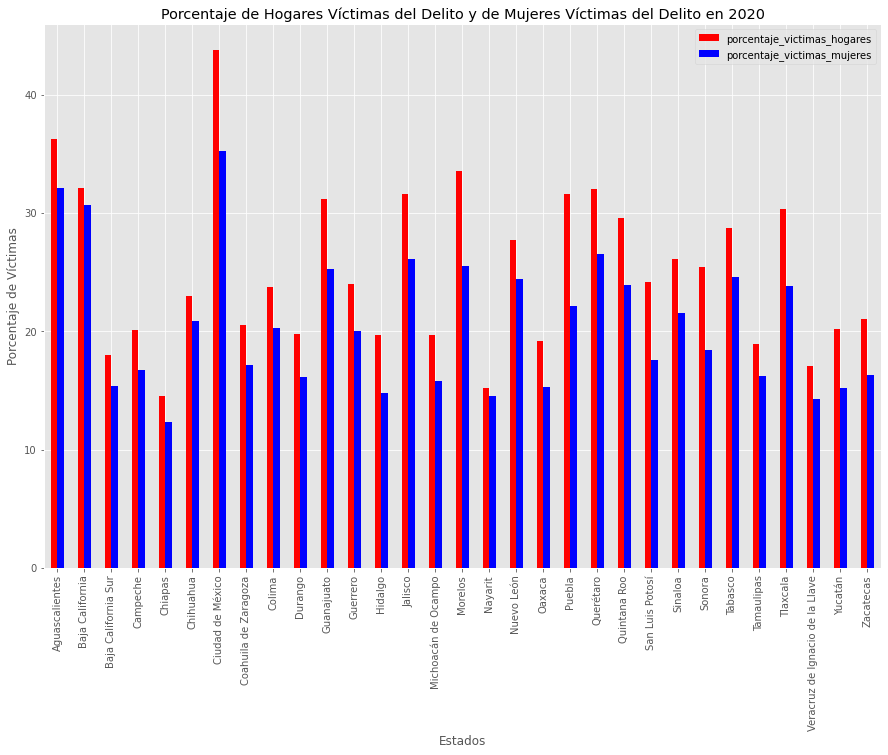

In [15]:
#Porcentaje de hogares Víctimas del Delito y Porcentaje de Mujeres Víctimas del Delito
df_2020 = df[df.Year == '2020'][['State','porcentaje_victimas_hogares','porcentaje_victimas_mujeres']]
df_2020.plot(x="State", y=['porcentaje_victimas_hogares','porcentaje_victimas_mujeres'], kind="bar",color =['red','blue'],figsize=(15,10))
plt.xlabel("Estados")
plt.ylabel("Porcentaje de Víctimas")
plt.title('Porcentaje de Hogares Víctimas del Delito y de Mujeres Víctimas del Delito en 2020')
plt.savefig('victimas_delito.png')
plt.show()


Ciudad de México presenta un porcentaje mayor en hogares víctimas del delito y en mujeres víctimas del delito en 2020. 

### Analicemos algunos estados de México

In [16]:
#Seleccionamos las siguientes Entidades
estados = ['Ciudad de México', 'Sonora','Guanajuato', 'Jalisco', 
           'Nuevo León', 'Baja California', 'Aguascalientes']

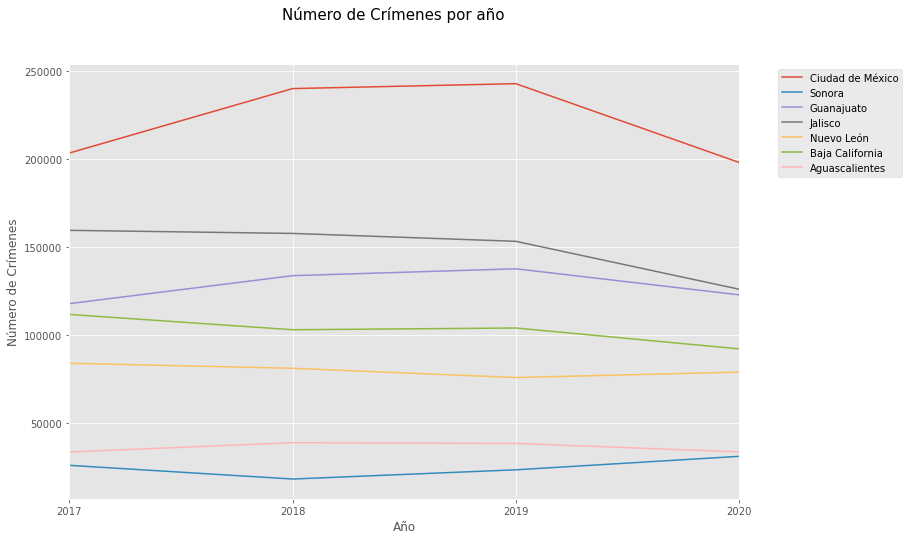

In [17]:
#Visualización de serie de tiempo del Número de Crímenes por Estado 
df_estados = df[['Year','State','Number_crimes']]

fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize = (12,8))
fig.suptitle('Número de Crímenes por año',fontsize = 15)

#Generamos un time series plot por cada Entidad
df_estados[df_estados.State=='Ciudad de México'].set_index('Year').plot(kind = 'line', ax = ax, label = 'CDMX')
df_estados[df_estados.State=='Sonora'].set_index('Year').plot(kind = 'line', ax = ax, label = 'SON')
df_estados[df_estados.State=='Guanajuato'].set_index('Year').plot(kind = 'line', ax = ax, label = 'GTO')
df_estados[df_estados.State=='Jalisco'].set_index('Year').plot(kind = 'line', ax = ax, label = 'JAL')
df_estados[df_estados.State=='Nuevo León'].set_index('Year').plot(kind = 'line', ax = ax, label = 'NL')
df_estados[df_estados.State=='Baja California'].set_index('Year').plot(kind = 'line', ax = ax, label = 'BC')
df_estados[df_estados.State=='Aguascalientes'].set_index('Year').plot(kind = 'line', ax = ax, label = 'AGS')

ax.set_xlabel('Año')
ax.set_ylabel('Número de Crímenes')
L=ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
L.get_texts()[0].set_text('Ciudad de México')
L.get_texts()[1].set_text('Sonora')
L.get_texts()[2].set_text('Guanajuato')
L.get_texts()[3].set_text('Jalisco')
L.get_texts()[4].set_text('Nuevo León')
L.get_texts()[5].set_text('Baja California')
L.get_texts()[6].set_text('Aguascalientes')


Podemos observar que Sonora presentó menor número de casos de crímenes contra los otros estados los últimos años.

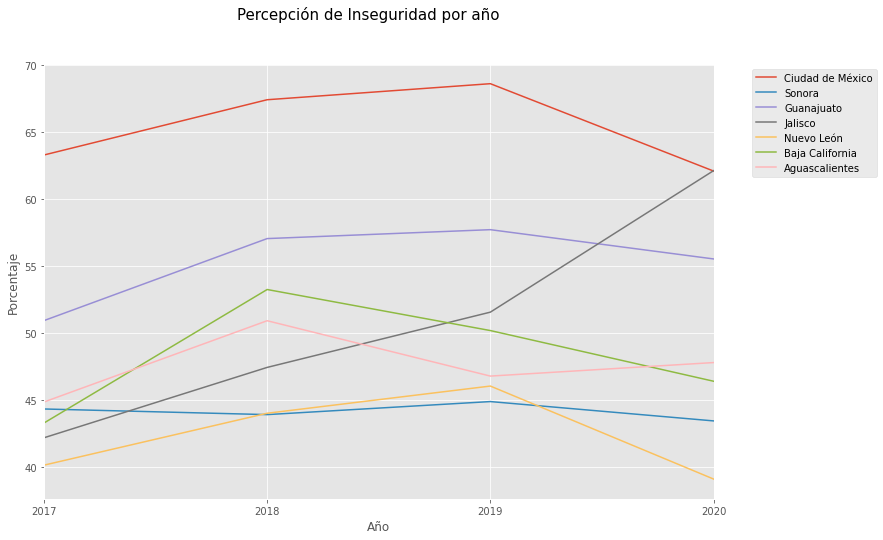

In [18]:
#Visualización de serie de tiempo de la Percepción de Inseguridad por Estado 
df_estados = df[['Year','State','percep_inseguridad']]

fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize = (12,8))
fig.suptitle('Percepción de Inseguridad por año',fontsize = 15)

#Generamos un time series plot por cada Entidad
df_estados[df_estados.State=='Ciudad de México'].set_index('Year').plot(kind = 'line', ax = ax, label = 'CDMX')
df_estados[df_estados.State=='Sonora'].set_index('Year').plot(kind = 'line', ax = ax, label = 'SON')
df_estados[df_estados.State=='Guanajuato'].set_index('Year').plot(kind = 'line', ax = ax, label = 'GTO')
df_estados[df_estados.State=='Jalisco'].set_index('Year').plot(kind = 'line', ax = ax, label = 'JAL')
df_estados[df_estados.State=='Nuevo León'].set_index('Year').plot(kind = 'line', ax = ax, label = 'NL')
df_estados[df_estados.State=='Baja California'].set_index('Year').plot(kind = 'line', ax = ax, label = 'BC')
df_estados[df_estados.State=='Aguascalientes'].set_index('Year').plot(kind = 'line', ax = ax, label = 'AGS')

ax.set_xlabel('Año')
ax.set_ylabel('Porcentaje')
L=ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
L.get_texts()[0].set_text('Ciudad de México')
L.get_texts()[1].set_text('Sonora')
L.get_texts()[2].set_text('Guanajuato')
L.get_texts()[3].set_text('Jalisco')
L.get_texts()[4].set_text('Nuevo León')
L.get_texts()[5].set_text('Baja California')
L.get_texts()[6].set_text('Aguascalientes')


Podemos observar que para las Entidades: Ciudad de México, Guanajuato, Jalisco, Nuevo León y Sonora se tuvo un incremento del porcentaje de percepción de inseguridad en los años 2018 y 2019. Mientras que para Baja California y Aguascalientes se presentó una baja en estos mismos años. 

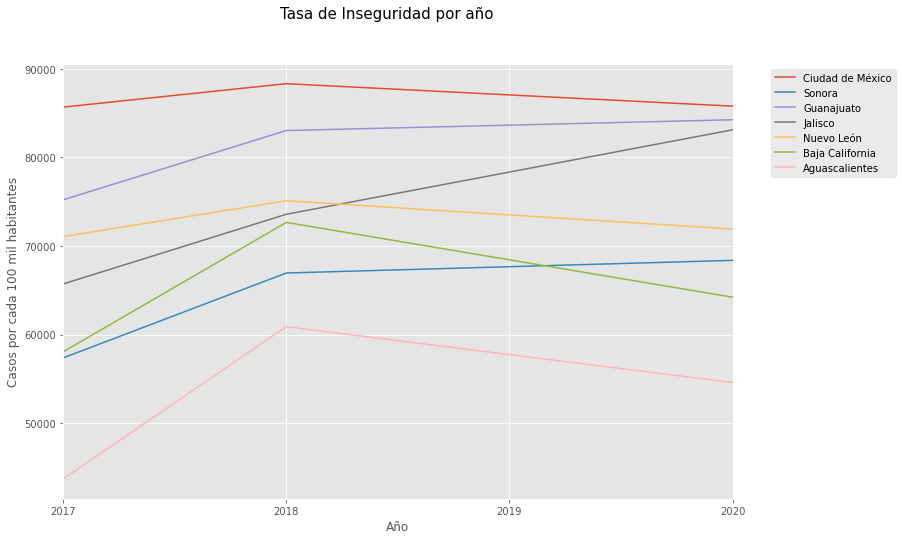

In [19]:
#Visualización de serie de tiempo de la Tasa de Inseguridad por Estado 
df_estados = df[['Year','State','tasa_inseg_estado']]

fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize = (12,8))
fig.suptitle('Tasa de Inseguridad por año',fontsize = 15)

#Generamos un time series plot por cada Entidad
df_estados[df_estados.State=='Ciudad de México'].set_index('Year').plot(kind = 'line', ax = ax, label = 'CDMX')
df_estados[df_estados.State=='Sonora'].set_index('Year').plot(kind = 'line', ax = ax, label = 'SON')
df_estados[df_estados.State=='Guanajuato'].set_index('Year').plot(kind = 'line', ax = ax, label = 'GTO')
df_estados[df_estados.State=='Jalisco'].set_index('Year').plot(kind = 'line', ax = ax, label = 'JAL')
df_estados[df_estados.State=='Nuevo León'].set_index('Year').plot(kind = 'line', ax = ax, label = 'NL')
df_estados[df_estados.State=='Baja California'].set_index('Year').plot(kind = 'line', ax = ax, label = 'BC')
df_estados[df_estados.State=='Aguascalientes'].set_index('Year').plot(kind = 'line', ax = ax, label = 'AGS')

ax.set_xlabel('Año')
ax.set_ylabel('Casos por cada 100 mil habitantes')
L=ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
L.get_texts()[0].set_text('Ciudad de México')
L.get_texts()[1].set_text('Sonora')
L.get_texts()[2].set_text('Guanajuato')
L.get_texts()[3].set_text('Jalisco')
L.get_texts()[4].set_text('Nuevo León')
L.get_texts()[5].set_text('Baja California')
L.get_texts()[6].set_text('Aguascalientes')


La tasa de inseguridad presentó un despunte en el año 2018 en todos los estados.

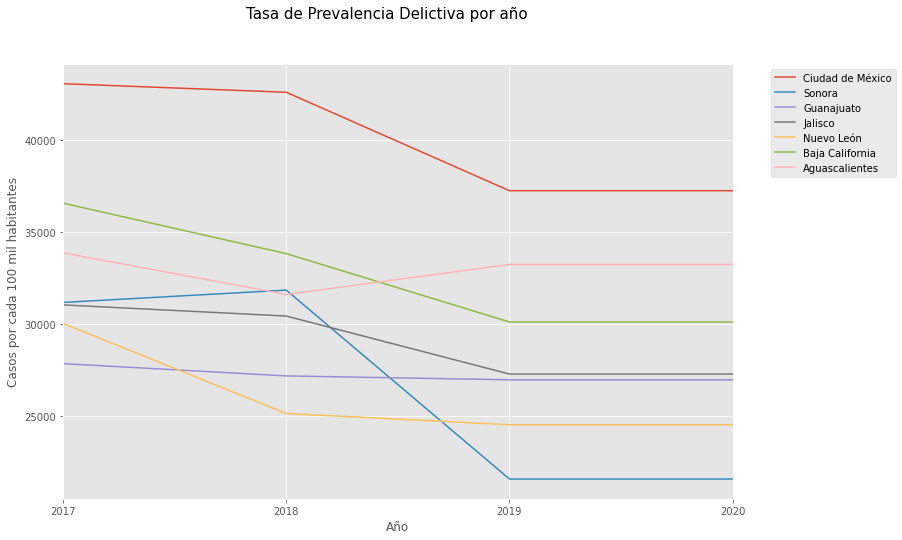

In [20]:
#Visualización de serie de tiempo de la Tasa de Prevalencia Delictiva por Estado 
df_estados = df[['Year','State','tasa_prev_delictiva']]

fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize = (12,8))
fig.suptitle('Tasa de Prevalencia Delictiva por año',fontsize = 15)

#Generamos un time series plot por cada Entidad
df_estados[df_estados.State=='Ciudad de México'].set_index('Year').plot(kind = 'line', ax = ax, label = 'CDMX')
df_estados[df_estados.State=='Sonora'].set_index('Year').plot(kind = 'line', ax = ax, label = 'SON')
df_estados[df_estados.State=='Guanajuato'].set_index('Year').plot(kind = 'line', ax = ax, label = 'GTO')
df_estados[df_estados.State=='Jalisco'].set_index('Year').plot(kind = 'line', ax = ax, label = 'JAL')
df_estados[df_estados.State=='Nuevo León'].set_index('Year').plot(kind = 'line', ax = ax, label = 'NL')
df_estados[df_estados.State=='Baja California'].set_index('Year').plot(kind = 'line', ax = ax, label = 'BC')
df_estados[df_estados.State=='Aguascalientes'].set_index('Year').plot(kind = 'line', ax = ax, label = 'AGS')

ax.set_xlabel('Año')
ax.set_ylabel('Casos por cada 100 mil habitantes')
L=ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
L.get_texts()[0].set_text('Ciudad de México')
L.get_texts()[1].set_text('Sonora')
L.get_texts()[2].set_text('Guanajuato')
L.get_texts()[3].set_text('Jalisco')
L.get_texts()[4].set_text('Nuevo León')
L.get_texts()[5].set_text('Baja California')
L.get_texts()[6].set_text('Aguascalientes')


Se observa que Sonora presenta una significativa descendencia de la Tasa de Prevalencia Delictiva desde el 2018.

## Data Tidy

Generaremos una base de datos Tidy, para eso, sólo se necesita hacer un cambio para la variable `State`. Pero antes crearemos una nueva característica que nos indique a cuál región pertenece el Estado o Entidad.

In [21]:
df

,Year,State,conf_policia,percep_ausencia_corrupcion_sistjud,percep_conf_jueces,percep_inseguridad,iden_polfed_efectivo,porcentaje_victimas_hogares,porcentaje_victimas_mujeres,tasa_incid_delictiva,tasa_inseg_localidad,tasa_inseg_estado,tasa_inseg_municipio,tasa_prev_delictiva,tasa_prev_delictiva_hombres,tasa_prev_delictiva_mujeres,Number_crimes,Regiones
0,2017-01-01,Aguascalientes,61.817796,31.930026,55.949418,44.827865,407012.0,38.153420,30.916999,39912.102305,44827.865476,43691.023274,42236.707531,33875.508856,37403.707853,30916.998913,33548,Centronorte
1,2017-01-01,Baja California,49.079807,31.875999,61.193246,43.258123,1215997.0,39.462809,36.984949,43921.170391,43258.122670,58046.093334,57866.636621,36578.058654,36137.616181,36984.948982,111722,Noroeste
2,2017-01-01,Baja California Sur,57.086667,32.155781,60.095192,36.963243,281409.0,26.761688,22.897988,25689.635950,36963.243484,60904.611272,63107.863667,24427.425925,26027.926176,22897.987797,24174,Noroeste
3,2017-01-01,Campeche,54.883432,31.043332,61.259995,44.118339,287020.0,28.819710,20.141363,28283.423371,44118.339148,57568.365503,59021.799152,22665.681125,25284.311603,20141.363362,2056,Sureste
4,2017-01-01,Chiapas,50.879062,29.359444,58.410852,35.523101,996821.0,20.108133,15.156709,20464.080303,35523.101315,61066.835066,61997.790672,15630.971192,16180.203169,15156.708958,25364,Suroeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2020-01-01,Tamaulipas,54.703823,33.857774,60.768262,35.651022,617731.0,18.962307,16.233807,21953.970337,35651.021565,79806.954758,66028.828541,16125.365215,16007.979074,16233.806741,31844,Noreste
120,2020-01-01,Tlaxcala,53.392521,17.898270,57.838594,49.094042,220443.0,30.342193,23.822996,30177.097976,49094.041763,67748.686286,63360.110654,25458.216854,27428.865528,23822.995716,4141,Oriente
121,2020-01-01,Veracruz de Ignacio de la Llave,54.014697,27.009913,54.243600,41.163234,913490.0,17.053887,14.240835,19542.262086,41163.233979,86058.585915,71167.467963,14108.415013,13961.232719,14240.834817,78967,Oriente
122,2020-01-01,Yucatán,79.514138,28.470360,62.897921,22.313800,262010.0,20.187240,15.178154,17685.614082,22313.800439,26570.007091,25154.621192,15436.697930,15742.113977,15178.153612,8417,Sureste


In [22]:
#Tidy data 
le = LabelEncoder()

df.State= le.fit_transform(df.State.values)
mapping_state = dict(zip(le.classes_, range(len(le.classes_)))) #Generamos un diccionario que nos guarde la transformación de estados

df.Regiones = le.fit_transform(df.Regiones.values)
mapping_regiones = dict(zip(le.classes_, range(len(le.classes_))))#diccionario de regiones
df.head()

,Year,State,conf_policia,percep_ausencia_corrupcion_sistjud,percep_conf_jueces,percep_inseguridad,iden_polfed_efectivo,porcentaje_victimas_hogares,porcentaje_victimas_mujeres,tasa_incid_delictiva,tasa_inseg_localidad,tasa_inseg_estado,tasa_inseg_municipio,tasa_prev_delictiva,tasa_prev_delictiva_hombres,tasa_prev_delictiva_mujeres,Number_crimes,Regiones
0,2017-01-01,0,61.817796,31.930026,55.949418,44.827865,407012.0,38.153420,30.916999,39912.102305,44827.865476,43691.023274,42236.707531,33875.508856,37403.707853,30916.998913,33548,0
1,2017-01-01,1,49.079807,31.875999,61.193246,43.258123,1215997.0,39.462809,36.984949,43921.170391,43258.122670,58046.093334,57866.636621,36578.058654,36137.616181,36984.948982,111722,3
2,2017-01-01,2,57.086667,32.155781,60.095192,36.963243,281409.0,26.761688,22.897988,25689.635950,36963.243484,60904.611272,63107.863667,24427.425925,26027.926176,22897.987797,24174,3
3,2017-01-01,3,54.883432,31.043332,61.259995,44.118339,287020.0,28.819710,20.141363,28283.423371,44118.339148,57568.365503,59021.799152,22665.681125,25284.311603,20141.363362,2056,6
4,2017-01-01,4,50.879062,29.359444,58.410852,35.523101,996821.0,20.108133,15.156709,20464.080303,35523.101315,61066.835066,61997.790672,15630.971192,16180.203169,15156.708958,25364,7


In [23]:
mapping_regiones

{'Centronorte': 0,
 'Centrosur': 1,
 'Noreste': 2,
 'Noroeste': 3,
 'Oeste': 4,
 'Oriente': 5,
 'Sureste': 6,
 'Suroeste': 7}

In [24]:
#Para guardar los datos tidy
df.to_csv('./percep_seguridad_crimenes_tidy.csv', index=False)

### Matriz de Correlación

<AxesSubplot:>

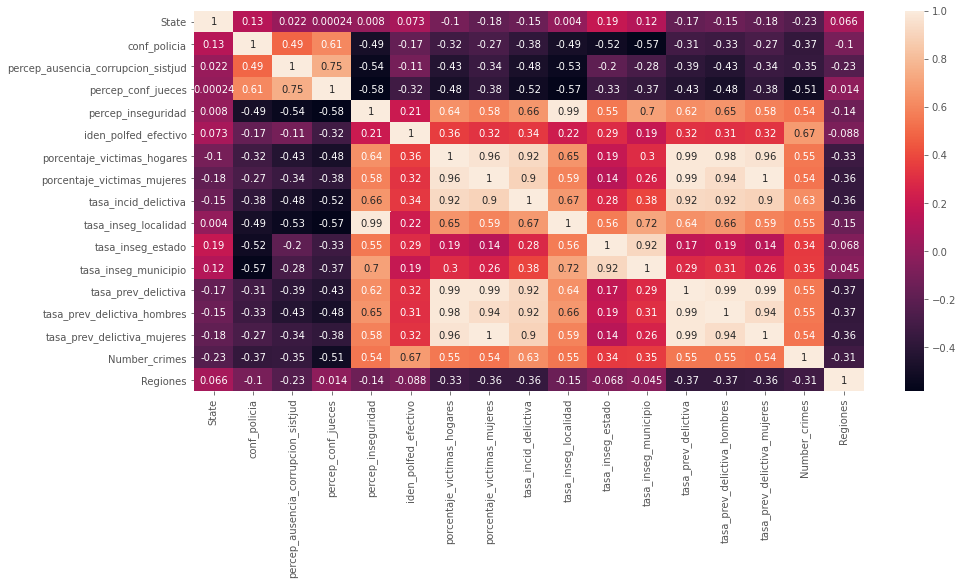

In [25]:
#Correlación entre las variables
sns.heatmap(df.corr(),annot = True)

Podemos observar que una gran cantidad de variables se correlacionan entre sí. 

### PCA

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

shape of X_pca (124, 9)
[0.50681203 0.155755   0.08441383 0.0710697  0.05875085 0.05098412
 0.02459787 0.01603622 0.01183759]
suma: 0.8768014045474806


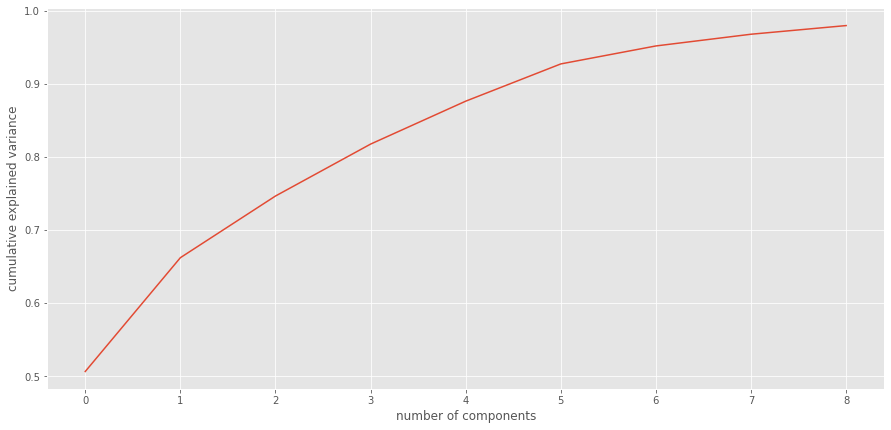

In [27]:
#Consideremos lo siguiente
df.Year = df.Year.dt.year

#normalizamos los datos
scaler=StandardScaler()
df_pca = df.drop(['Regiones'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df_pca) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df_pca)# Ahora si, escalo los datos y los normalizo
 
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=9) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada
 
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
 

Observemos que si consideramos las 6 primeras componentes, se tendría información de un 95% de los datos.

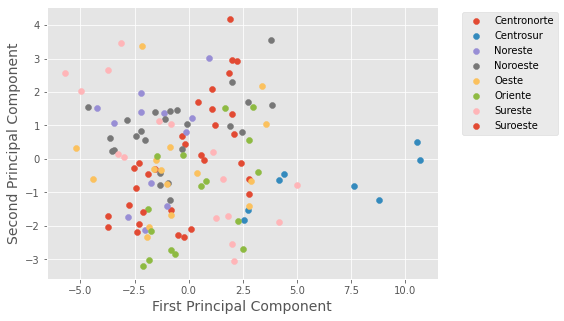

In [28]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales

Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=df['Regiones'].values
#cdict={0:'red',1:'green', 2:'blue', 3:'purple'}
labl={v: k for k, v in mapping_regiones.items()} #Invertimos el diccionario de Regiones
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],label=labl[l])
 
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()